In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/polynomial-linear-regression-dataset/rank_salary.csv


In [3]:
# lets import some required libs for visualizations
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
# reading in the dataset as a data frame 
df = pd.read_csv("/kaggle/input/polynomial-linear-regression-dataset/rank_salary.csv")

# displaying the first five rows
df.head(20)

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000
5,Professor,6,150000
6,Associate Dean,7,200000
7,Dean,8,300000
8,Vice Chancellor,9,500000
9,Chancellor,10,1000000


In [11]:
print("shape of the dataset:",df.shape)
print("data types of feature columns:\n",df.dtypes)

shape of the dataset: (10, 3)
data types of feature columns:
 Position    object
Level        int64
Salary       int64
dtype: object


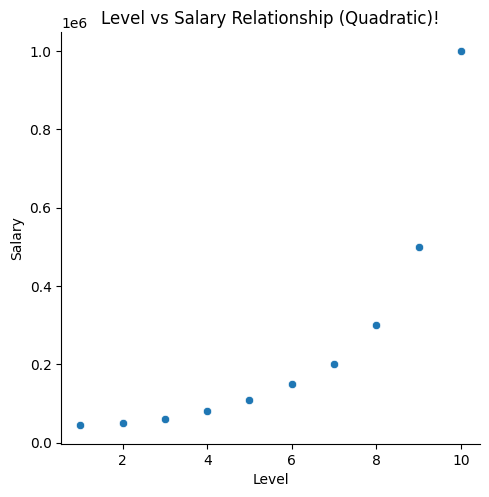

In [13]:
# ok since we have level feature that do encode the position feature numerically!
# we could rely on that featurre alone 
sns.relplot(x=df["Level"],y=df["Salary"],data=df,kind="scatter")
plt.title("Level vs Salary Relationship (Quadratic)!")
plt.show()

In [18]:
# splitting the dataset into inputs and outputs 
X = df["Level"]
###############################################
y = df["Salary"]
print("X data matrix shape:",X.shape)
print("y target outcomes shape:",y.shape)
print("number of dimensions: X = ",X.ndim)
print("number of dimensions: Y = ",y.ndim)
###############################################

X data matrix shape: (10,)
y target outcomes shape: (10,)
number of dimensions: X =  1
number of dimensions: Y =  1


In [20]:
# ok lets start fit a linear model using our data for fun!
X = np.array(X)
y = np.array(y)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# split the dataset into train and test subsets 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,shuffle=True,random_state=10)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

# instantiate the model object
linear_model = LinearRegression()

# fit the linear model on the training dataset!
linear_model.fit(X_train.reshape(-1,1),y_train)

# evalute the model 
print("R2 score on training set = ",r2_score(y_train,linear_model.predict(X_train.reshape(-1,1))))
print("R2 score on testing set = ",r2_score(y_test,linear_model.predict(X_test.reshape(-1,1))))
print("training dataset mean squared error:",mean_squared_error(y_train,linear_model.predict(X_train.reshape(-1,1))))
print("testing dataset mean squared error:",mean_squared_error(y_test,linear_model.predict(X_test.reshape(-1,1))))

X_train shape: (9,)
X_test shape: (1,)
y_train shape: (9,)
y_test shape: (1,)
R2 score on training set =  0.6396434606174952
R2 score on testing set =  nan
training dataset mean squared error: 29505192652.329758
testing dataset mean squared error: 1878942832.9864805


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


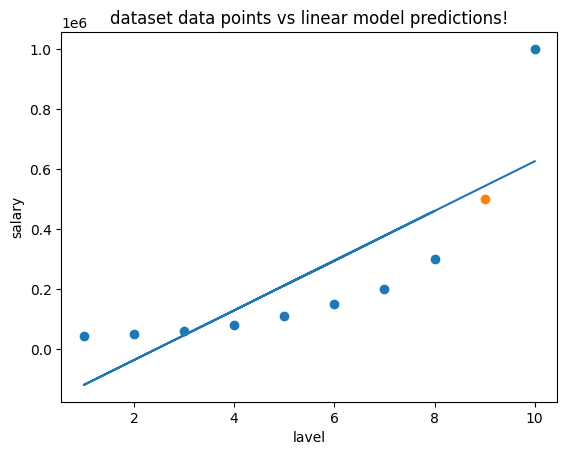

In [46]:
# ok lets visualize the model 
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)
plt.plot(X_train,linear_model.predict(X_train.reshape(-1,1)))
plt.plot(X_test,linear_model.predict(X_test.reshape(-1,1)))
plt.title("dataset data points vs linear model predictions!")
plt.xlabel("lavel")
plt.ylabel("salary")
plt.show()

# ***Seems like the linear model can not capture the non linearity in the data right, ..... so lets go working with second degree order polynomial equation y = w_0 + w_1X + w_2X(2)***

a = 19431.818046718017
b = -132871.21048660117
c = 232166.66266006813
Is everything is good! True


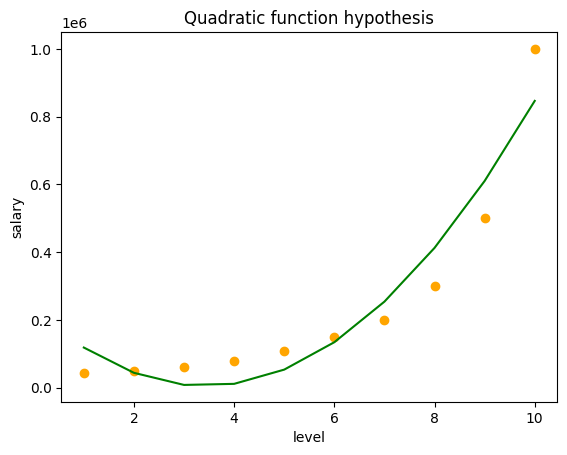

In [103]:
from scipy.optimize import curve_fit

# lets define my function
def quadratic(x,a,b,c):
    """
    this function takes in feature value and returns the output 
    represting the quadratic polynomial equation 
    
    Args:
        x (int): level rank position of an individual
        a (float): coefficient of the squared term x**2
        b (float): coefficient of the term x**1 
        c (float): coefficient of the bias term x**0
    Returns:
        y (float): salary of an individual (Wow!)
    """
    y = a*(x**2)+b*(x)+c
    return y

# lets fit the model skeleton right lets go!
params, covariance = curve_fit(quadratic,X,y)

# lets loop over the paramaters values and see whats going on
ps = np.array(["a","b","c"])
for i in range(len(params)):
    print(f"{ps[i]} = {params[i]}")
    
y_pred = quadratic(X,*params) #unpacking the params numpy array 

# checking if the lenghts are equal
print("Is everything is good!",len(y)==len(y_pred))

# lets plot and see if we did make it :)
plt.scatter(X,y,color="orange")
plt.plot(X,y_pred,color="green")
plt.xlabel("level")
plt.ylabel("salary")
plt.title("Quadratic function hypothesis")
plt.show()

In [109]:
print("r2_score for 2nd degree polynomial:",round(r2_score(y,y_pred),2)*100,"%")

r2_score for 2nd degree polynomial: 92.0 %


a = 4120.04642006044
b = -48548.947691668436
c = 180664.32012543932
d = -121333.31512174426
Is everything is good! True


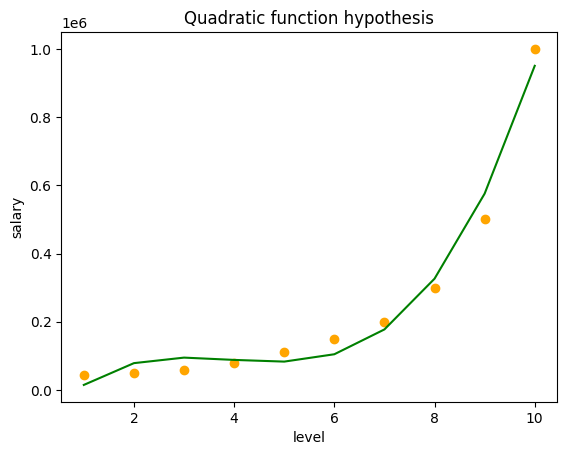

In [112]:
# lets try a thrid degree polynomial 
def cubic(x,a,b,c,d):
    return a*(x**3) + b*(x**2) + c*x + d

params_new, covariance_new = curve_fit(cubic,X,y)


# lets loop over the paramaters values and see whats going on
ps = np.array(["a","b","c","d"])
for i in range(len(params_new)):
    print(f"{ps[i]} = {params_new[i]}")
    
y_pred_new = cubic(X,*params_new) #unpacking the params numpy array 

# checking if the lenghts are equal
print("Is everything is good!",len(y)==len(y_pred_new))

# lets plot and see if we did make it :)
plt.scatter(X,y,color="orange")
plt.plot(X,y_pred_new,color="green")
plt.xlabel("level")
plt.ylabel("salary")
plt.title("Quadratic function hypothesis")
plt.show()

In [113]:
print("r2_score for 3nd degree polynomial:",round(r2_score(y,y_pred_new),2)*100,"%")

r2_score for 3nd degree polynomial: 98.0 %


# ***Seems like as we go deeper in terms of n degrees we could over fit right!***

# ***Thanks for watching :) Kidding I hope you find my notebook helpful!***